### In this notebook, we look more closely at how positional encoding is implemented.
```python
# Temporarily leave PositionalEncoding module here. Will be moved somewhere else.
class PositionalEncoding(nn.Module):
    r"""Inject some information about the relative or absolute position of the tokens in the sequence.
        The positional encodings have the same dimension as the embeddings, so that the two can be summed.
        Here, we use sine and cosine functions of different frequencies.
    .. math:
        \text{PosEncoder}(pos, 2i) = sin(pos/10000^(2i/d_model))
        \text{PosEncoder}(pos, 2i+1) = cos(pos/10000^(2i/d_model))
        \text{where pos is the word position and i is the embed idx)
    Args:
        d_model: the embed dim (required).
        dropout: the dropout value (default=0.1).
        max_len: the max. length of the incoming sequence (default=5000).
    Examples:
        >>> pos_encoder = PositionalEncoding(d_model)
    """

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        r"""Inputs of forward function
        Args:
            x: the sequence fed to the positional encoder model (required).
        Shape:
            x: [sequence length, batch size, embed dim]
            output: [sequence length, batch size, embed dim]
        Examples:
            >>> output = pos_encoder(x)
        """

        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)
```

In [1]:
import torch
import matplotlib.pyplot as plt
import math

In [60]:
max_len = 128
d_model = 128
pe = torch.zeros(max_len, d_model)
position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
pe[:, 0::2] = torch.sin(position * div_term)
pe[:, 1::2] = torch.cos(position * div_term)
pe = pe.unsqueeze(0).transpose(0, 1)

In [61]:
position.shape, div_term.shape, pe.shape

(torch.Size([128, 1]), torch.Size([64]), torch.Size([128, 1, 128]))

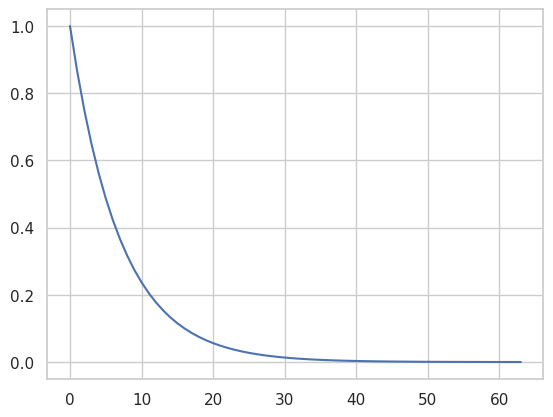

In [62]:
plt.plot(div_term)

In [65]:
-math.log(10000.0)/8

-1.151292546497023

In [69]:
math.exp(1)**(-0.1)

0.9048374180359595

In [49]:
import seaborn

<Axes: >

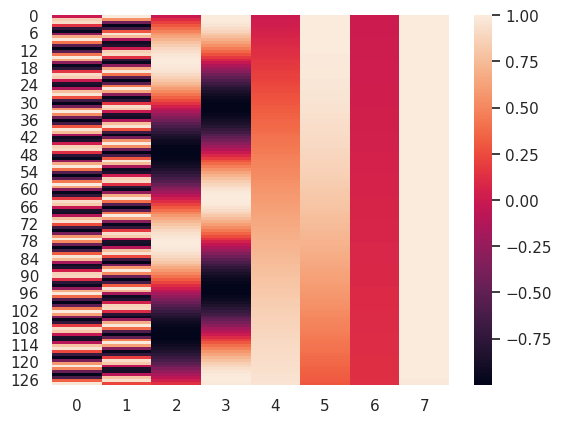

In [50]:
seaborn.heatmap(pe[:,0,:])

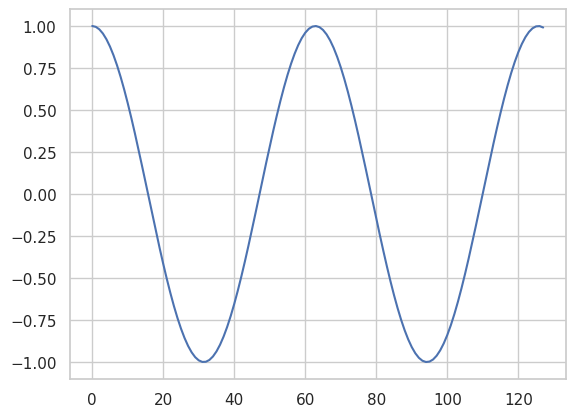

In [53]:
plt.plot(pe[:,0,3])

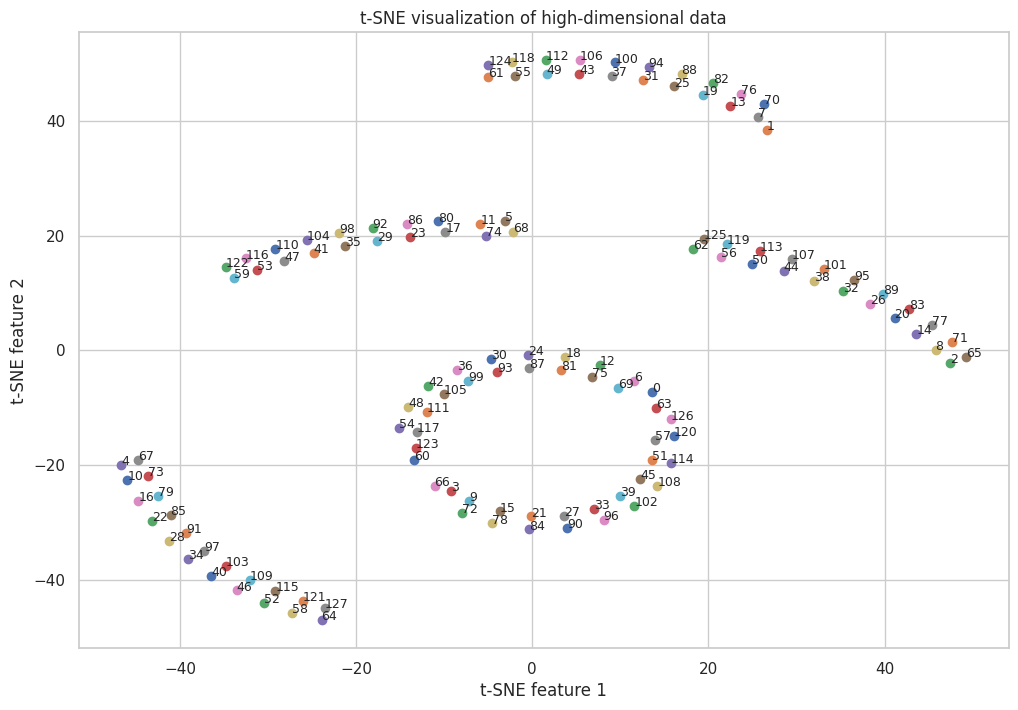

In [57]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming X is your matrix with multiple dimensions per sample
# For this example, let's create a random dataset
X = pe[:,0,:].numpy()  # 100 samples with 20 features each

# Create a t-SNE instance: you can specify the number of components (n_components), 
# which is the number of dimensions you want to reduce your data to.
tsne = TSNE(n_components=2, random_state=0,perplexity=4)

# Fit and transform the data with t-SNE: this can take some time depending on your dataset size
X_tsne = tsne.fit_transform(X)

# Plotting the result of t-SNE
plt.figure(figsize=(12, 8))
for i in range(X_tsne.shape[0]):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1])
    plt.annotate(f'{i}', (X_tsne[i, 0], X_tsne[i, 1]), fontsize=9)
plt.title('t-SNE visualization of high-dimensional data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


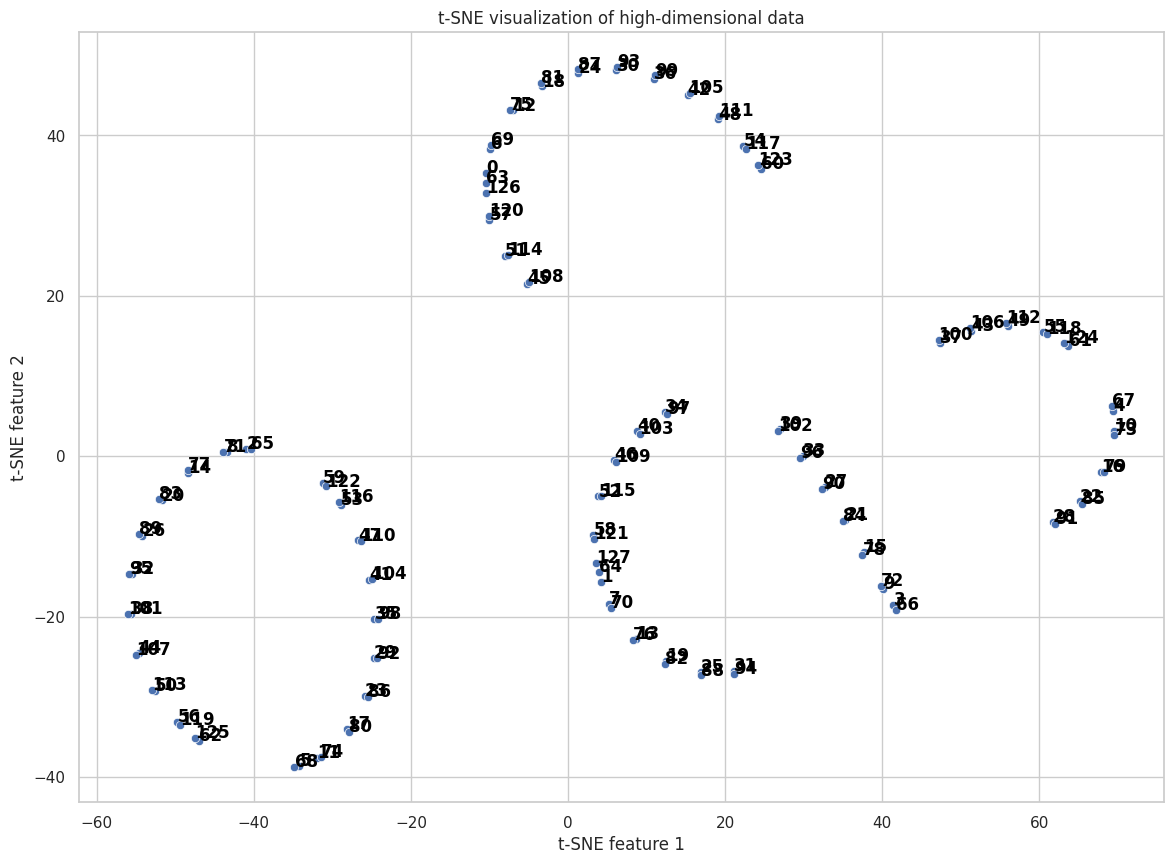

In [59]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your matrix with multiple dimensions per sample
# For this example, let's create a random dataset
X = pe[:,0,:].numpy()  # 100 samples with 20 features each

# Create a t-SNE instance: you can specify the number of components (n_components),
# which is the number of dimensions you want to reduce your data to.
tsne = TSNE(n_components=2, random_state=0, perplexity=2)

# Fit and transform the data with t-SNE: this can take some time depending on your dataset size
X_tsne = tsne.fit_transform(X)

# Convert to DataFrame for Seaborn usage
import pandas as pd
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Sample'] = [str(i) for i in range(X.shape[0])]

# Use Seaborn to plot
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(14, 10))

# Plotting the result of t-SNE
scatter = sns.scatterplot(x="TSNE1", y="TSNE2", data=tsne_df, legend=False)

# Annotate each point in scatterplot
for line in range(0, tsne_df.shape[0]):
     scatter.text(tsne_df.TSNE1[line]+0.01, tsne_df.TSNE2[line], 
                  tsne_df.Sample[line], horizontalalignment='left', 
                  size='medium', color='black', weight='semibold')

plt.title('t-SNE visualization of high-dimensional data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


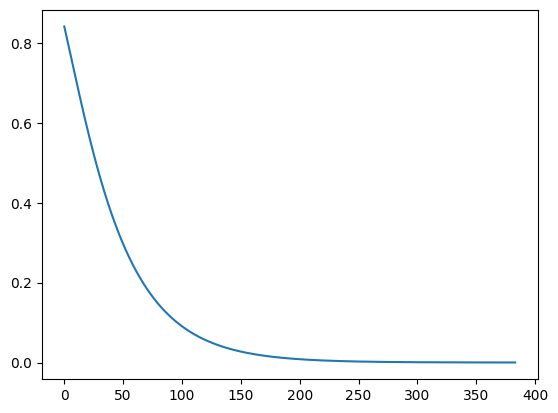

In [5]:
plt.plot(pe[1,0,0::2])

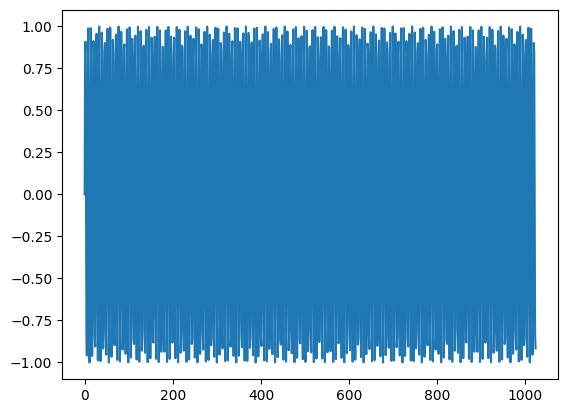

In [9]:
plt.plot(pe[:,0,0])

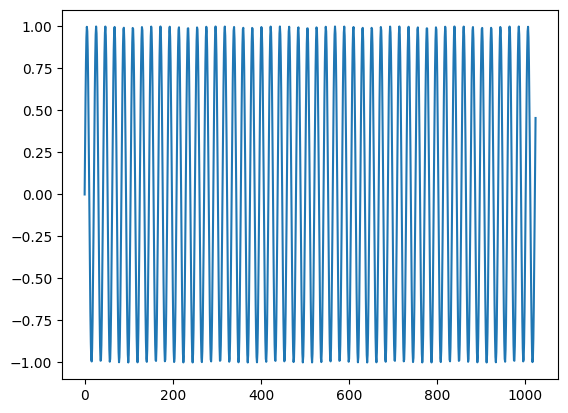

In [11]:
plt.plot(pe[:,0,100])

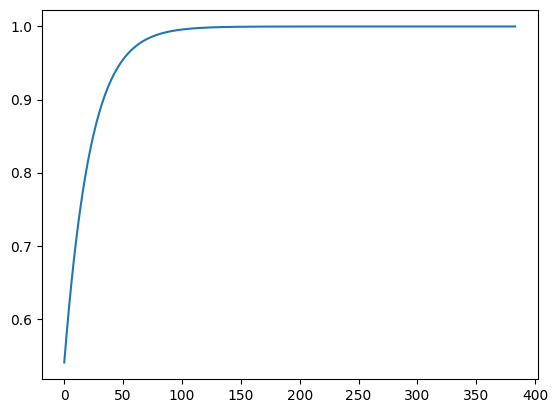

In [6]:
plt.plot(pe[1,0,1::2])

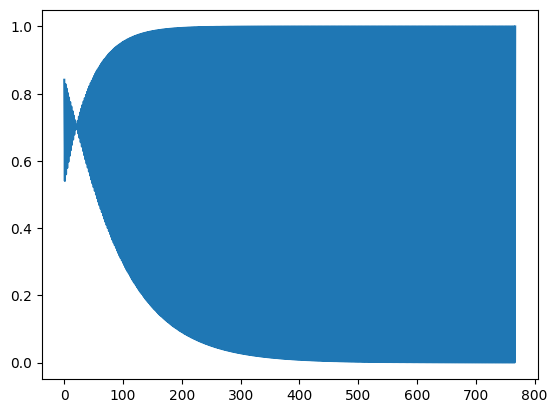

In [7]:
plt.plot(pe[1,0,:])

In [3]:
S,B,E = 1024, 128, 768

In [4]:
x = torch.rand((S,B,E),dtype=torch.float32)

In [6]:
x.shape

torch.Size([1024, 128, 768])

In [7]:
pe = PositionalEncoding(E)

In [8]:
xp = pe(x)

In [9]:
xp.shape

torch.Size([1024, 128, 768])

In [10]:
pe.pe.shape

torch.Size([5000, 1, 768])

In [12]:
pe.pe[:100,:].shape

torch.Size([100, 1, 768])

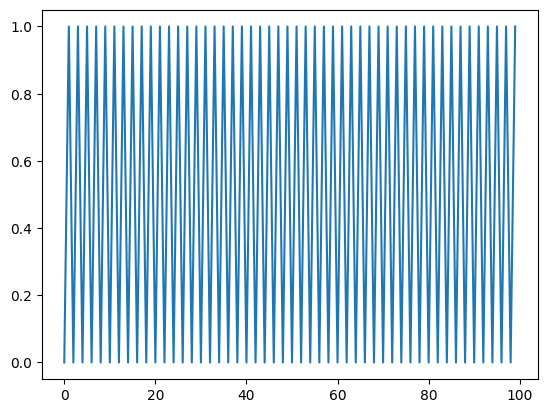

In [25]:
plt.plot(pe.pe[0,0,:100])

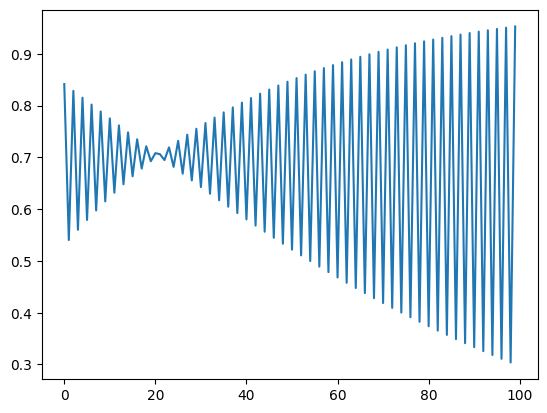

In [27]:
plt.plot(pe.pe[1,0,:100])

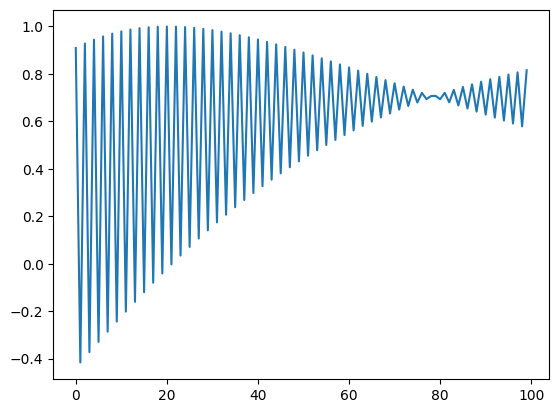

In [28]:
plt.plot(pe.pe[2,0,:100])

In [29]:
import math
max_len = S
d_model = E
position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

In [30]:
position.shape, div_term.shape

(torch.Size([1024, 1]), torch.Size([384]))

In [31]:
t = position * div_term
t.shape

torch.Size([1024, 384])

$\text{div_term}[i] = \exp \left( i \times \left( -\frac{\log(10000.0)}{d_{\text{model}}} \right) \right)\ for\ i\ in\ (\text{arange}(0,\ d_{\text{model}},\ 2))$